In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

# Nettoyage

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df = df.rename(columns={"sex": "genre"})
df = df.rename(columns={"bmi":"IMC"})
df = df.rename(columns={"children":"enfants"})
df = df.rename(columns={"smoker":"fumeur"})

In [6]:
df.columns

Index(['age', 'genre', 'IMC', 'enfants', 'fumeur', 'region', 'charges'], dtype='object')

In [7]:
label_encoder = preprocessing.LabelEncoder() 

In [8]:
df["genre"]=label_encoder.fit_transform(df["genre"])
df["genre"].unique()
#0 = femme ; 1 = homme

array([0, 1])

In [9]:
df["fumeur"]=label_encoder.fit_transform(df["fumeur"])
df["fumeur"].unique()
#0 = non-fumeur ; 1 = fumeur

array([1, 0])

In [10]:
df.head()

,age,genre,IMC,enfants,fumeur,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [11]:
df.query("genre== 1").shape[0]



676

In [12]:
df.dtypes

age          int64
genre        int64
IMC        float64
enfants      int64
fumeur       int64
region      object
charges    float64
dtype: object

In [13]:
df.head()

,age,genre,IMC,enfants,fumeur,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [14]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
encoder = OneHotEncoder(sparse_output=False)

In [16]:
one_hot = encoder.fit_transform(df[['region']])

In [17]:
regions_encoded = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['region']))
df = pd.concat([df, regions_encoded], axis=1)

In [18]:
df = df.drop(columns=['region'])

In [19]:
df.duplicated().any()

np.True_

In [20]:
df.isna().any()
#vérifie si chaque colonne contient au moins une valeur manquante


age                 False
genre               False
IMC                 False
enfants             False
fumeur              False
charges             False
region_northeast    False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool

In [21]:
doublons = df[df.duplicated()]
print(doublons)

     age  genre    IMC  enfants  fumeur    charges  region_northeast  \
581   19      1  30.59        0       0  1639.5631               0.0   

     region_northwest  region_southeast  region_southwest  
581               1.0               0.0               0.0  


In [22]:
df[df['charges'] == 1639.5631]

,age,genre,IMC,enfants,fumeur,charges,region_northeast,region_northwest,region_southeast,region_southwest
195,19,1,30.59,0,0,1639.5631,0.0,1.0,0.0,0.0
581,19,1,30.59,0,0,1639.5631,0.0,1.0,0.0,0.0


In [23]:
df = df.drop(index=581, axis=0)


In [24]:
df[(df["age"] > 20) & (df["genre"] == 1)]

,age,genre,IMC,enfants,fumeur,charges,region_northeast,region_northwest,region_southeast,region_southwest
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
8,37,1,29.830,2,0,6406.41070,1.0,0.0,0.0,0.0
10,25,1,26.220,0,0,2721.32080,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1324,31,1,25.935,1,0,4239.89265,0.0,1.0,0.0,0.0
1325,61,1,33.535,0,0,13143.33665,1.0,0.0,0.0,0.0
1327,51,1,30.030,1,0,9377.90470,0.0,0.0,1.0,0.0
1329,52,1,38.600,2,0,10325.20600,0.0,0.0,0.0,1.0


In [25]:
df.to_csv("/home/sami/Documents/Dev_IA/Briefprimeassurance/dataset_cleaned.csv", index=False)


# Visualisation

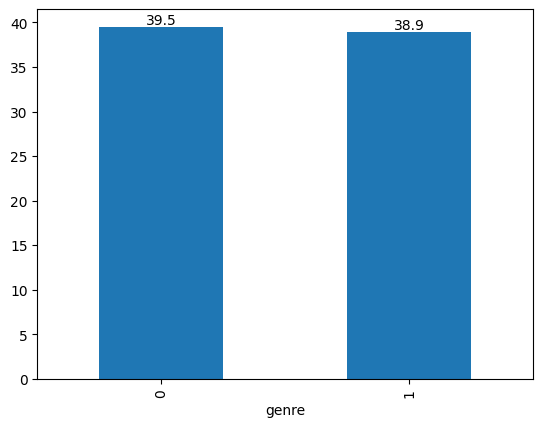

In [26]:
age_moyen = df.groupby("genre")["age"].mean()
ax = age_moyen.plot(kind='bar')

for patch in ax.patches:
    height = patch.get_height()  # Hauteur de chaque barre
    width = patch.get_width()    # Largeur de chaque barre
    x_position = patch.get_x() + width / 2  # Position horizontale du texte (centrée dans chaque bin)
    
    ax.text(x_position, height, str(round(height, 1)),  # Afficher la fréquence à l'intérieur de chaque bin
            ha='center', va='bottom')

In [27]:
df.groupby("genre").agg({"age" : "mean"})

#age moy par genre

,age
genre,
0,39.503021
1,38.946667


In [28]:
df.groupby("genre").agg({"IMC" : "mean"}).round(2)

#imc moy par genre

,IMC
genre,
0,30.38
1,30.94


In [29]:
df.groupby("genre").agg({"enfants" : "mean"})

#nb enfant moy par genre

,enfants
genre,
0,1.074018
1,1.117037


In [30]:
df.groupby("genre").agg({"fumeur" : "mean"})

#moy fumeur par genre

,fumeur
genre,
0,0.173716
1,0.235556


In [83]:
df_result = df.groupby('genre')['fumeur'].mean().reset_index()
df_result

,genre,fumeur
0,0,0.173716
1,1,0.235556


In [88]:
# df.groupby('genre')['fumeur'].mean()
df.groupby('genre').agg({"IMC":'mean', "fumeur" : "mean"})

,IMC,fumeur
genre,,
0,30.377749,0.173716
1,30.943652,0.235556


In [87]:
iimc = df.groupby('genre').agg({"IMC":'mean'})
iimc

,IMC
genre,
0,30.377749
1,30.943652


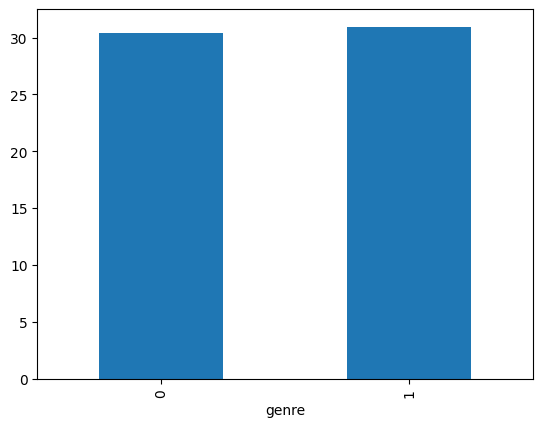

In [31]:
imc_moyen_homme = df.groupby("genre")["IMC"].mean()
ax = imc_moyen_homme.plot(kind='bar')

1. Analyse univariée (analyse de chaque variable indépendamment)
Pour les variables catégoriques :

- Barplot : Répartition des individus par région (region).
- Pie chart : Proportion des fumeurs et non-fumeurs (smoker).
- Barplot : Répartition des individus selon le sexe (sex).

Pour les variables numériques :

- Histogramme : Distribution de l'âge (age).
- Boxplot : Détection des valeurs extrêmes dans charges ou bmi.
- Histogramme : Distribution du nombre d'enfants (children).

In [32]:
df.columns

Index(['age', 'genre', 'IMC', 'enfants', 'fumeur', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

<Axes: xlabel='region_northeast,region_northwest,region_southeast,region_southwest'>

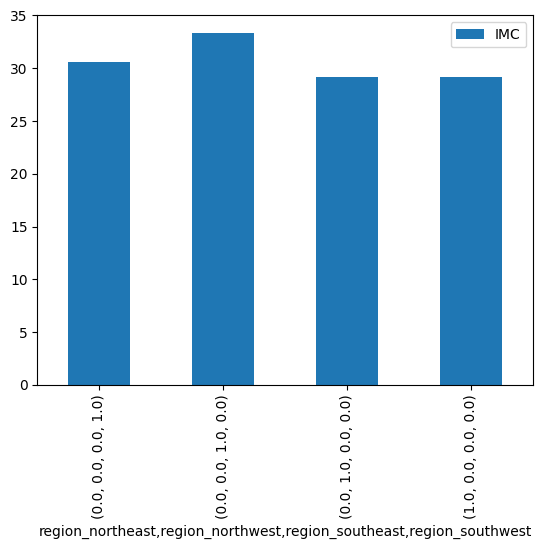

In [33]:
imc_region = df[['region_northeast', 'region_northwest', 'region_southeast','region_southwest']].join(df["IMC"]).groupby(['region_northeast', 'region_northwest', 'region_southeast','region_southwest']).mean()
imc_region.plot(kind="bar")

In [89]:
a = df[["charges", "IMC"]].groupby("IMC")


In [92]:
df[df["age"].between(18, 30)]

,age,genre,IMC,enfants,fumeur,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
10,25,1,26.220,0,0,2721.32080,1.0,0.0,0.0,0.0
12,23,1,34.400,0,0,1826.84300,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1328,23,0,24.225,2,0,22395.74424,1.0,0.0,0.0,0.0
1331,23,0,33.400,0,0,10795.93733,0.0,0.0,0.0,1.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0


In [90]:
df[["charges", "IMC"]]

,charges,IMC
0,16884.92400,27.900
1,1725.55230,33.770
2,4449.46200,33.000
3,21984.47061,22.705
4,3866.85520,28.880
...,...,...
1333,10600.54830,30.970
1334,2205.98080,31.920
1335,1629.83350,36.850
1336,2007.94500,25.800


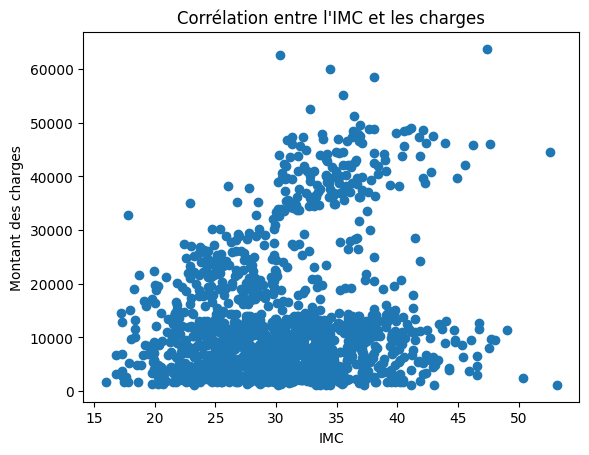

In [35]:
plt.scatter(x = df['IMC'], y = df['charges'])
plt.title("Corrélation entre l'IMC et les charges")
plt.xlabel("IMC")
plt.ylabel("Montant des charges")
plt.show()

<Axes: xlabel='age', ylabel='charges'>

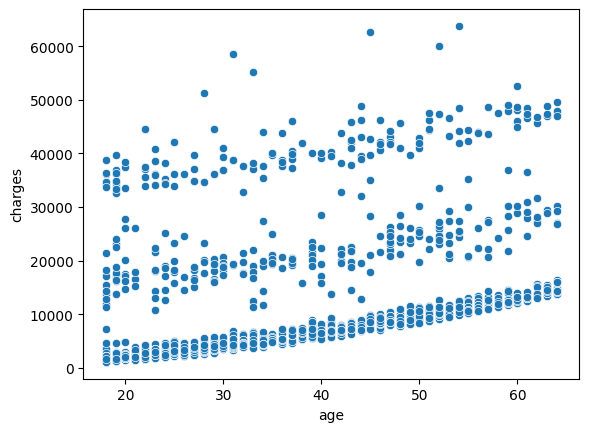

In [36]:
sns.scatterplot(data = df, y = "charges", x = "age")

In [37]:
df[df["enfants"]==5][["charges"]].describe()

,charges
count,18.000000
mean,8786.035247
std,3808.435525
min,4687.797000
25%,5874.973900
50%,8589.565050
75%,10019.943975
max,19023.260000


<Axes: >

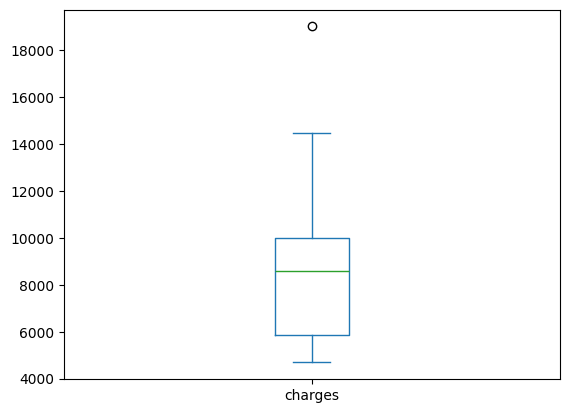

In [38]:
a = df[df["enfants"]==5][["charges"]]
a.plot(kind="box")

In [107]:
df.groupby('genre').agg({"IMC":'mean', "fumeur" : "mean"})


,IMC,fumeur
genre,,
0,30.377749,0.173716
1,30.943652,0.235556


In [39]:
df[df["fumeur"]==1][["charges"]].describe()

,charges
count,274.000000
mean,32050.231832
std,11541.547176
min,12829.455100
25%,20826.244213
50%,34456.348450
75%,41019.207275
max,63770.428010


In [95]:
df.loc[df["fumeur"] == 1, ["charges"]]


,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
...,...
1313,36397.57600
1314,18765.87545
1321,28101.33305
1323,43896.37630


In [97]:
df[df['age'] == 20]

,age,genre,IMC,enfants,fumeur,charges,region_northeast,region_northwest,region_southeast,region_southwest
64,20,0,22.420,0,1,14711.74380,0.0,1.0,0.0,0.0
105,20,1,28.025,1,1,17560.37975,0.0,1.0,0.0,0.0
122,20,0,28.975,0,0,2257.47525,0.0,1.0,0.0,0.0
134,20,0,28.785,0,0,2457.21115,1.0,0.0,0.0,0.0
166,20,0,37.000,5,0,4830.63000,0.0,0.0,0.0,1.0
210,20,1,33.000,1,0,1980.07000,0.0,0.0,0.0,1.0
261,20,0,26.840,1,1,17085.26760,0.0,0.0,1.0,0.0
374,20,1,33.330,0,0,1391.52870,0.0,0.0,1.0,0.0
453,20,1,29.735,0,0,1769.53165,0.0,1.0,0.0,0.0
495,20,1,27.930,0,0,1967.02270,1.0,0.0,0.0,0.0


In [98]:
df[df['age'] == 20][["charges"]]

,charges
64,14711.74380
105,17560.37975
122,2257.47525
134,2457.21115
166,4830.63000
210,1980.07000
261,17085.26760
374,1391.52870
453,1769.53165
495,1967.02270


<Axes: >

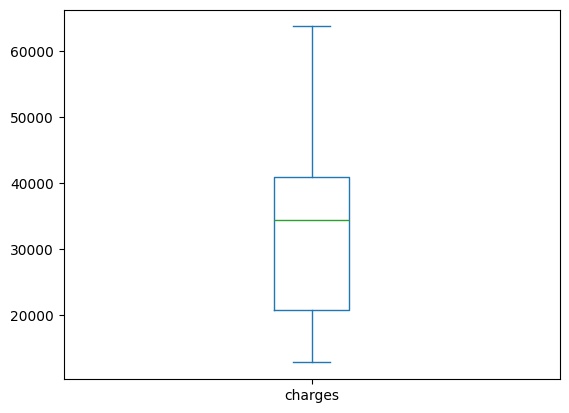

In [ ]:
comparaison = df[df["fumeur"]==1][["charges"]]
comparaison.plot(kind="box")

In [41]:
genres = df[(df["genre"] == 0) | (df["genre"] == 1)]
genres = genres[["charges", "genre"]]
result = genres.groupby("genre").mean()

<Axes: xlabel='genre'>

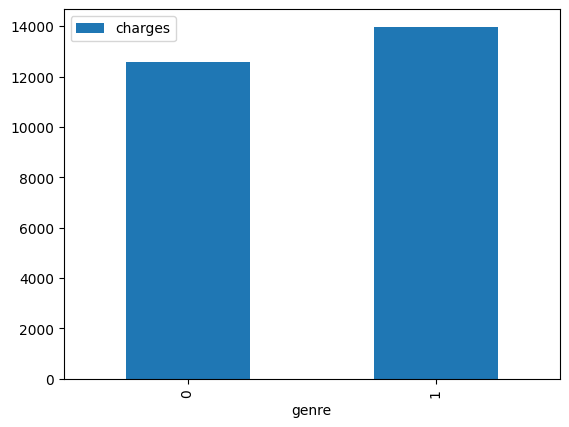

In [42]:
result.plot(kind="bar")


## 3.

In [93]:
df[(df["genre"] == 0) | (df["genre"] == 1)]

,age,genre,IMC,enfants,fumeur,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


<Axes: xlabel='genre'>

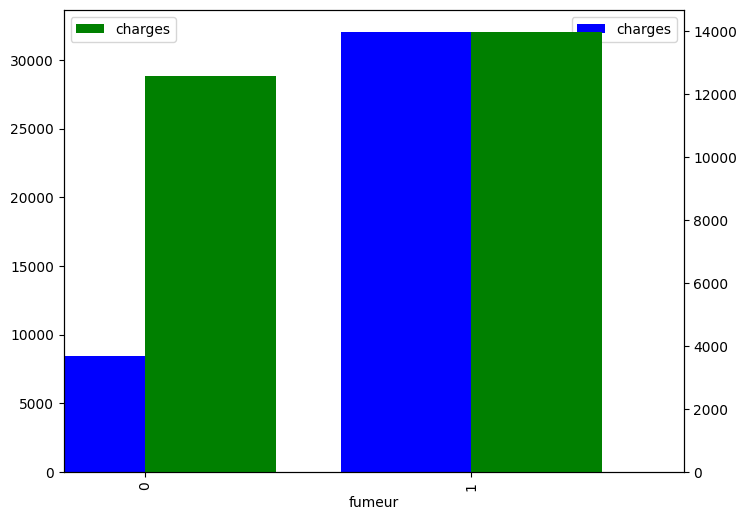

In [43]:
genres = df[(df["genre"] == 0) | (df["genre"] == 1)]
fumeurs = df[(df["fumeur"] == 0) | (df["fumeur"] == 1)]

result_fumeur = fumeurs.groupby("fumeur").agg({"charges" : "mean"})
result_genre = genres.groupby("genre").agg({"charges" : "mean"})

fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()

result_fumeur.plot(kind="bar", ax=ax1, position=1, width=0.4, color='b', label='Fumeurs')
result_genre.plot(kind="bar", ax=ax2, position=0, width=0.4, color='g', label='Genre')



In [44]:
result_genre = genres.groupby("genre").agg({"charges" : "mean"})
result_genre

,charges
genre,
0,12569.578844
1,13974.998864


In [45]:
result_fumeur

,charges
fumeur,
0,8440.660307
1,32050.231832


In [46]:
df["fumeur"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: fumeur, Length: 1337, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

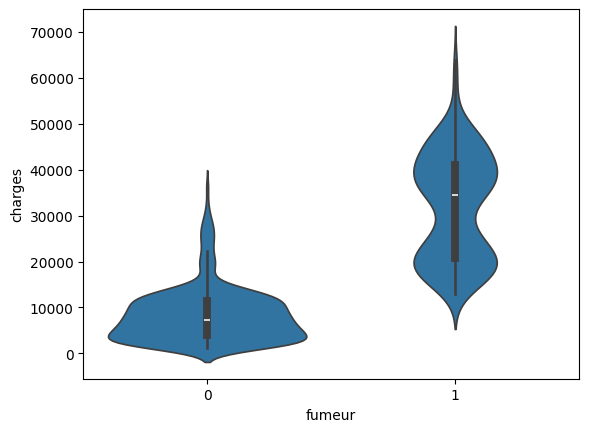

In [47]:
sns.violinplot(x=df["fumeur"], y =df["charges"])
plt.show

In [48]:
charge_fumeur_northeast = df[(df["region_northeast"] == 1.0) & (df["fumeur"] == 1)] [["charges"]]
charge_fumeur_northeast

,charges
23,37701.87680
38,39774.27630
92,30184.93670
98,22412.64850
123,39556.49450
...,...
1278,22462.04375
1282,14283.45940
1304,21259.37795
1306,16115.30450


<Axes: ylabel='charges'>

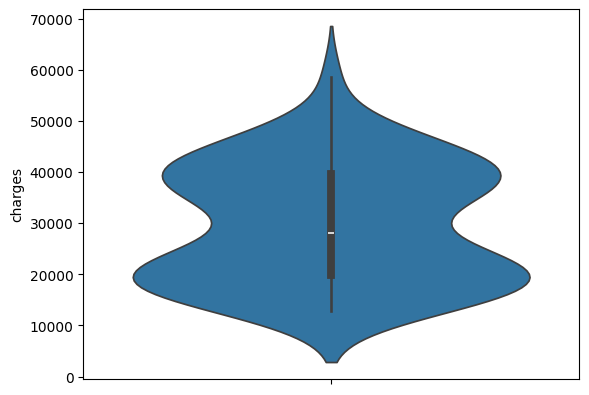

In [49]:
sns.violinplot(y = charge_fumeur_northeast["charges"])



In [50]:
df.columns

Index(['age', 'genre', 'IMC', 'enfants', 'fumeur', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [51]:
df[["charges", "IMC", "region_northeast"]]

,charges,IMC,region_northeast
0,16884.92400,27.900,0.0
1,1725.55230,33.770,0.0
2,4449.46200,33.000,0.0
3,21984.47061,22.705,0.0
4,3866.85520,28.880,0.0
...,...,...,...
1333,10600.54830,30.970,0.0
1334,2205.98080,31.920,1.0
1335,1629.83350,36.850,0.0
1336,2007.94500,25.800,0.0


<Axes: ylabel='charges'>

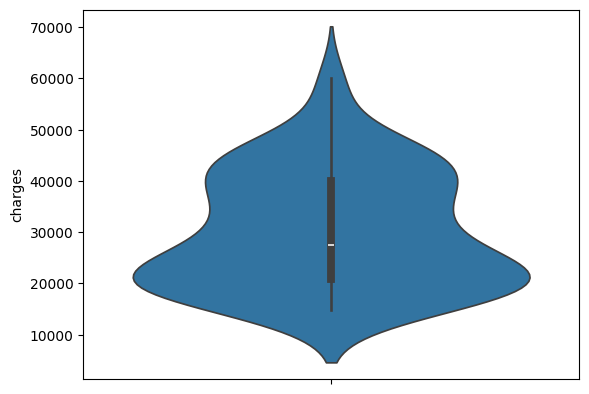

In [52]:
charge_fumeur_region_northwest = df[(df["region_northwest"] == 1.0) & (df["fumeur"] == 1)] [["charges"]]
sns.violinplot(y = charge_fumeur_region_northwest["charges"])

<Axes: ylabel='charges'>

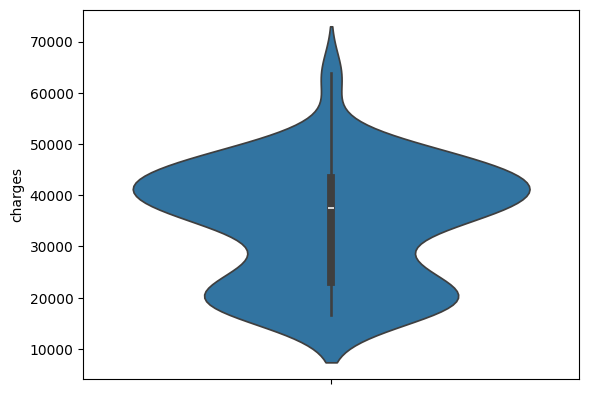

In [53]:
charge_fumeur_region_southeast = df[(df["region_southeast"] == 1.0) & (df["fumeur"] == 1)] [["charges"]]
sns.violinplot(y = charge_fumeur_region_southeast["charges"])

<Axes: ylabel='charges'>

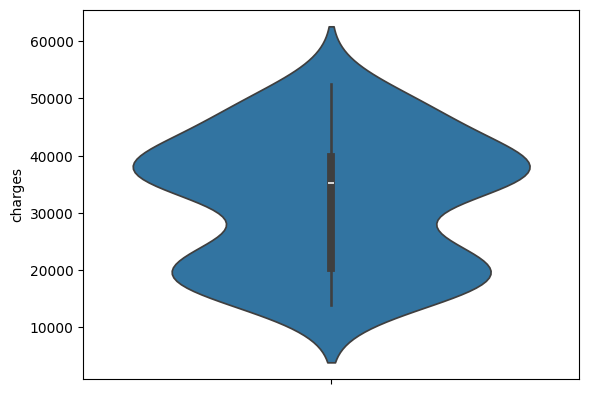

In [54]:
charge_fumeur_region_southwest = df[(df["region_southwest"] == 1.0) & (df["fumeur"] == 1)] [["charges"]]
sns.violinplot(y = charge_fumeur_region_southwest["charges"])


In [55]:
fumeurs = df[(df["fumeur"] == 0) | (df["fumeur"] == 1)]
fumeurs

,age,genre,IMC,enfants,fumeur,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


In [56]:
df[["fumeur"]]

,fumeur
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [57]:
result_fumeur = fumeurs.groupby("fumeur").agg({"charges" : "mean"})
result_fumeur


,charges
fumeur,
0,8440.660307
1,32050.231832


moyenne des charges pour hommes region nordest

In [58]:
homme = df[(df["genre"] == 1)]
homme

,age,genre,IMC,enfants,fumeur,charges,region_northeast,region_northwest,region_southeast,region_southwest
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
8,37,1,29.830,2,0,6406.41070,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1324,31,1,25.935,1,0,4239.89265,0.0,1.0,0.0,0.0
1325,61,1,33.535,0,0,13143.33665,1.0,0.0,0.0,0.0
1327,51,1,30.030,1,0,9377.90470,0.0,0.0,1.0,0.0
1329,52,1,38.600,2,0,10325.20600,0.0,0.0,0.0,1.0


In [59]:
charge_homme_northeast = df[(df["region_northeast"] == 1.0) & (df["genre"] == 1)].groupby("genre").agg({"charges" : "mean"})
charge_homme_northeast

,charges
genre,
1,13854.005374


In [111]:
df[df['age'] == 20][["charges"]].mean()


charges    10159.697736
dtype: float64

In [60]:
charge_homme_northeast = df[(df["region_northeast"] == 1.0) & (df["genre"] == 1)]["charges"].mean()
charge_homme_southeast = df[(df["region_southeast"] == 1.0) & (df["genre"] == 1)]["charges"].mean()
charge_homme_northwest = df[(df["region_northwest"] == 1.0) & (df["genre"] == 1)]["charges"].mean()
charge_homme_southwest = df[(df["region_southwest"] == 1.0) & (df["genre"] == 1)]["charges"].mean()

In [61]:
charge_femme_northeast = df[(df["region_northeast"] == 1.0) & (df["genre"] == 0)]["charges"].mean()
charge_femme_southeast = df[(df["region_southeast"] == 1.0) & (df["genre"] == 0)]["charges"].mean()
charge_femme_northwest = df[(df["region_northwest"] == 1.0) & (df["genre"] == 0)]["charges"].mean()
charge_femme_southwest = df[(df["region_southwest"] == 1.0) & (df["genre"] == 0)]["charges"].mean()

In [125]:
df_charges = {
    "region": ["northeast", "southeast", "northwest", "southwest"] ,
    "charges": [
        charge_homme_northeast, charge_homme_southeast, charge_homme_northwest, charge_homme_southwest
        
    ],
    "genre": ["Homme"] * 4 + ["Femme"] * 4
}

sns.barplot(x="region", y="charges", hue="genre", data=df_charges)

plt.title("Moyennes des charges par genre et par région")
plt.show()

ValueError: All arrays must be of the same length

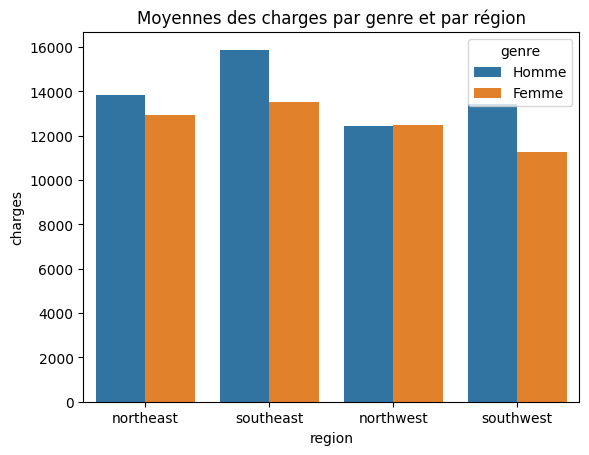

In [62]:
df_charges = {
    "region": ["northeast", "southeast", "northwest", "southwest"] * 2,
    "charges": [
        charge_homme_northeast, charge_homme_southeast, charge_homme_northwest, charge_homme_southwest,
        charge_femme_northeast, charge_femme_southeast, charge_femme_northwest, charge_femme_southwest
    ],
    "genre": ["Homme"] * 4 + ["Femme"] * 4
}

sns.barplot(x="region", y="charges", hue="genre", data=df_charges)

plt.title("Moyennes des charges par genre et par région")
plt.show()

In [114]:
charge_fumeur = df[(df["fumeur"] == 1)]["charges"]
charge_nonfumeur = df[(df["fumeur"] == 0)]["charges"]

fumeuroui = df[(df["fumeur"] == 1)]
fumeurnon = df[(df["fumeur"] == 0)]

df_charges2 = pd.DataFrame({
    "IMC": df["IMC"],  
    "charges": pd.concat([charge_fumeur, charge_nonfumeur], axis=0),
    "fumeur": df["fumeur"].replace({1: "Fumeur", 0: "Non fumeur"}) 
})

df_charges2.head()

,IMC,charges,fumeur
0,27.900,16884.92400,Fumeur
1,33.770,1725.55230,Non fumeur
2,33.000,4449.46200,Non fumeur
3,22.705,21984.47061,Non fumeur
4,28.880,3866.85520,Non fumeur


<Axes: xlabel='IMC', ylabel='charges'>

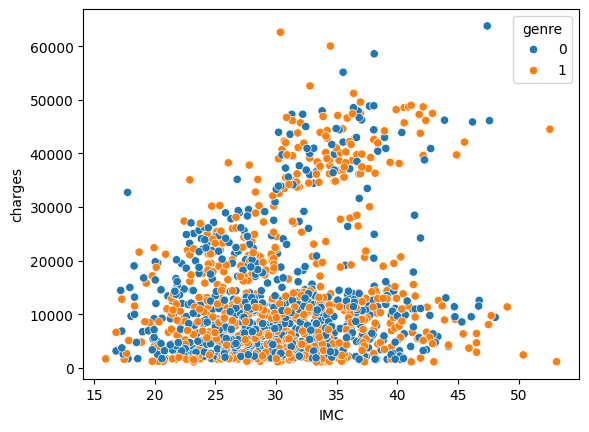

In [118]:
sns.scatterplot(data=df, x="IMC", y="charges", hue="genre")


## 4.

In [65]:
charge_northeast1 = df[(df["region_northeast"] == 1.0) & (df["fumeur"] == 1.0) ]["charges"].mean()
charge_northwest2 = df[(df["region_northwest"] == 1.0) & (df["fumeur"] == 1.0) ]["charges"].mean()
charge_southeast3 = df[(df["region_southeast"] == 1.0) & (df["fumeur"] == 1.0) ]["charges"].mean()
charge_southwest4 = df[(df["region_southwest"] == 1.0)& (df["fumeur"] == 1.0) ]["charges"].mean()


In [ ]:


df_charges_fumeur = {
    "region": ["northwest", "northeast", "southwest", "southeast"],
    "charges": [
        charge_northeast1, charge_northwest2, charge_southwest4, charge_southeast3,
    ]
}

sns.barplot(x="region", y="charges", data=df_charges_fumeur)

plt.title("Moyennes des charges de fumeurs par région")
plt.show()


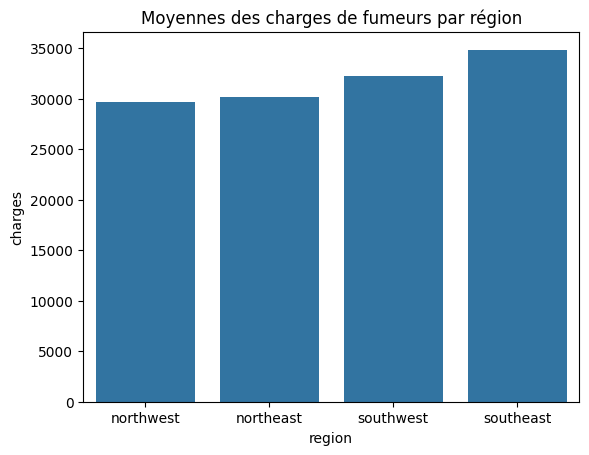

In [66]:


df_charges_fumeur = {
    "region": ["northwest", "northeast", "southwest", "southeast"],
    "charges": [
        charge_northeast1, charge_northwest2, charge_southwest4, charge_southeast3,
    ]
}

sns.barplot(x="region", y="charges", data=df_charges_fumeur)

plt.title("Moyennes des charges de fumeurs par région")
plt.show()



<Axes: xlabel='region_northeast,region_northwest,region_southeast,region_southwest'>

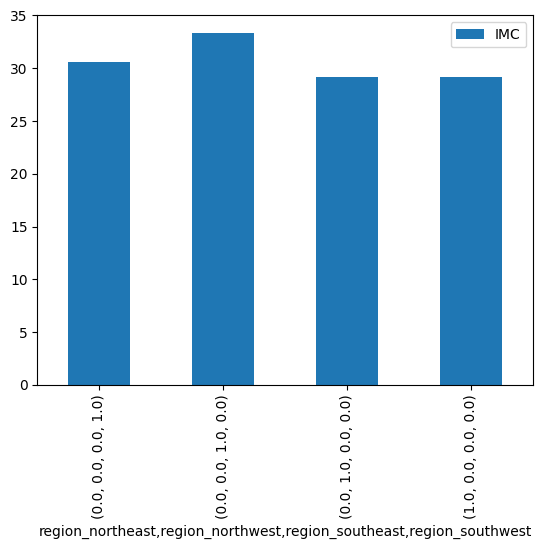

In [67]:
imc_region = df[['region_northeast', 'region_northwest', 'region_southeast','region_southwest']].join(df["IMC"]).groupby(['region_northeast', 'region_northwest', 'region_southeast','region_southwest']).mean()
imc_region.plot(kind="bar")

In [68]:
charge_northeast = df[(df["region_northeast"] == 1.0)]["charges"].mean()
charge_northwest = df[(df["region_northwest"] == 1.0)]["charges"].mean()
charge_southeast = df[(df["region_southeast"] == 1.0)]["charges"].mean()
charge_southwest = df[(df["region_southwest"] == 1.0)]["charges"].mean()

<Axes: xlabel='genre', ylabel='charges'>

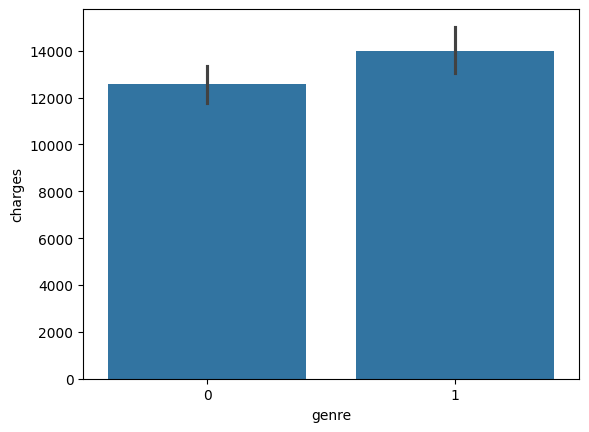

In [123]:
sns.barplot(x="genre", y="charges", data=df)

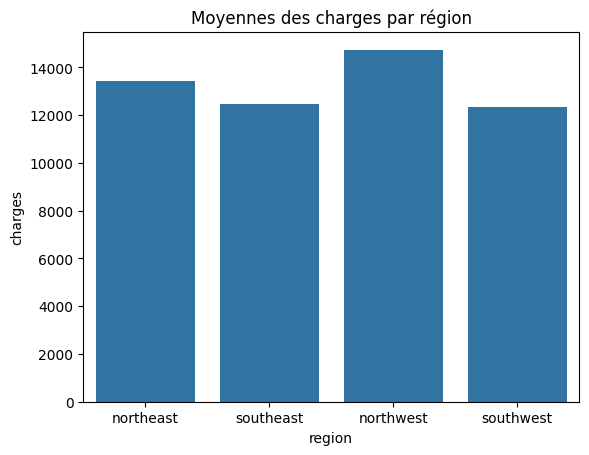

In [69]:
df_charges = {
    "region": ["northeast", "southeast", "northwest", "southwest"],
    "charges": [
        charge_northeast, charge_northwest, charge_southeast, charge_southwest,
    ]
}

sns.barplot(x="region", y="charges", data=df_charges)

plt.title("Moyennes des charges par région")
plt.show()

<Axes: xlabel='fumeur', ylabel='IMC'>

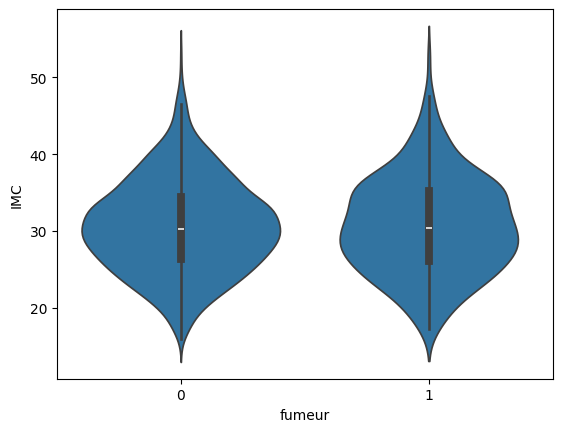

In [70]:
sns.violinplot(x=df["fumeur"], y = df["IMC"])

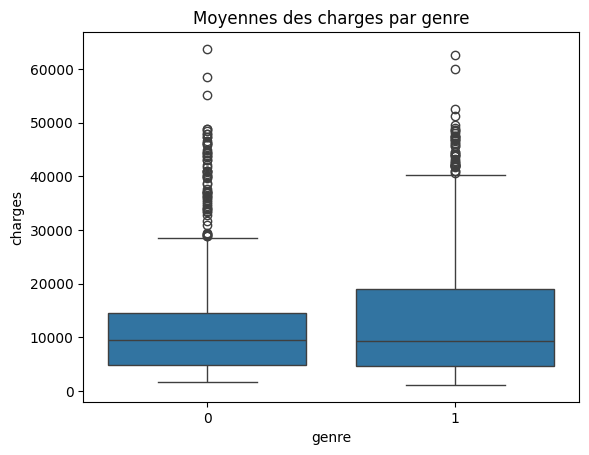

In [71]:
sns.boxplot(x="genre", y="charges", data = df)

plt.title("Moyennes des charges par genre")
plt.show()

<Axes: xlabel='fumeur', ylabel='age'>

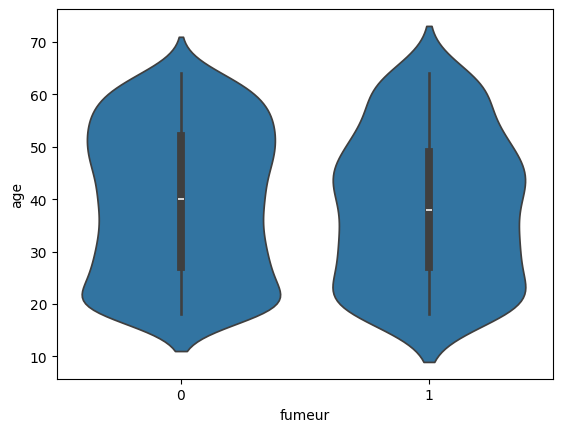

In [72]:
sns.violinplot(x=df["fumeur"], y = df["age"])

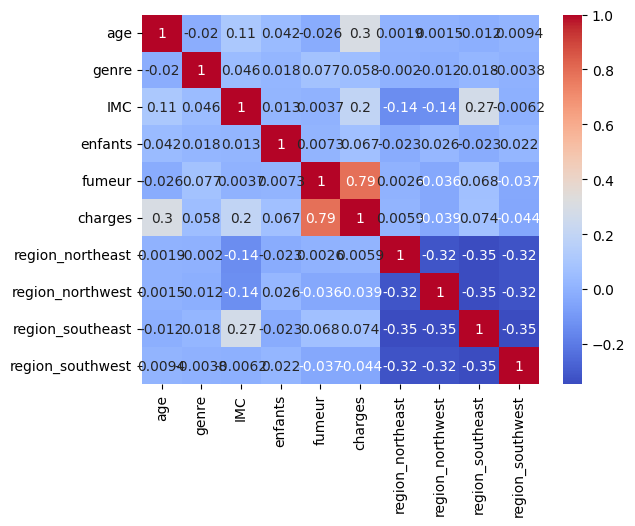

In [73]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [74]:
df.columns

Index(['age', 'genre', 'IMC', 'enfants', 'fumeur', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')